In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#библиотеки препроцессинга
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder) #кодирование категориальных признаков
from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler) #масштабирование
from sklearn.model_selection import train_test_split #разделение на обучающую и тестовую выборку

#работа с балансировкой
from imblearn.over_sampling import SMOTE

In [2]:
!pip install gdown

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/datasets/building.xlsx'
df = pd.read_excel(file_path)

df.head()

,Месяц,V(n-1)p0,Vnp0,I,Курс доллара,Темпы инфляции,Ставка ЦБ РФ,Объём ИЖК
0,Январь,249581,252545,101.187590,30.26,0.97,5.5,217.7
1,Февраль,261834,262040,100.078676,30.16,0.56,5.5,332.8
2,Март,360725,360840,100.031880,30.80,0.34,7.0,447.3
3,Апрель,398545,383110,96.127163,31.33,0.51,7.0,465.8
4,Май,415762,421795,101.451071,31.24,0.66,7.5,545.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Месяц           12 non-null     object 
 1   V(n-1)p0        12 non-null     int64  
 2   Vnp0            12 non-null     int64  
 3   I               12 non-null     float64
 4   Курс доллара    12 non-null     float64
 5   Темпы инфляции  12 non-null     float64
 6   Ставка ЦБ РФ    12 non-null     float64
 7   Объём ИЖК       12 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 900.0+ bytes


In [6]:
df.describe()

,V(n-1)p0,Vnp0,I,Курс доллара,Темпы инфляции,Ставка ЦБ РФ,Объём ИЖК
count,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,475979.666667,467255.916667,98.558569,31.839167,0.52250,8.166667,402.858333
std,146262.686803,138598.124668,3.559098,1.038885,0.23371,2.987347,150.269936
min,249581.000000,252545.000000,91.881084,30.160000,0.14000,5.500000,217.700000
25%,389090.000000,377542.500000,96.594953,31.130000,0.40000,7.000000,322.375000
50%,520485.000000,508228.000000,98.206817,32.170000,0.53500,7.500000,369.950000
75%,547716.000000,537636.750000,100.355904,32.670000,0.59250,8.000000,451.925000
max,769464.000000,744669.000000,105.850453,33.020000,0.97000,17.000000,788.500000


In [7]:
df = df.drop('Месяц', axis=1)

<Axes: >

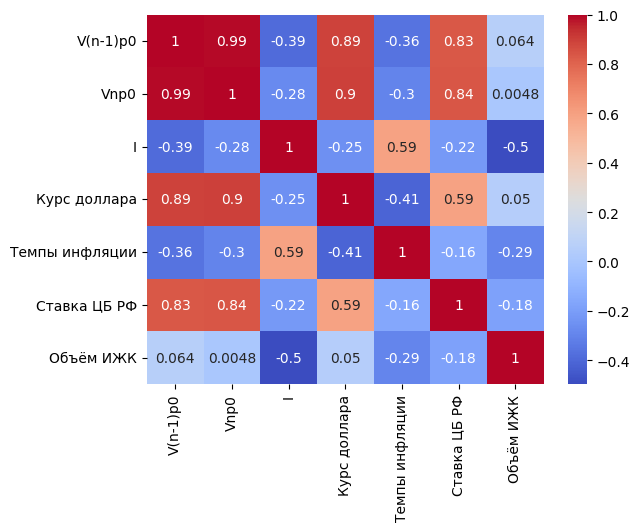

In [8]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [9]:
#отберем топ К коррелируем призна
k = 4

corrmat = df.corr()

cols = corrmat.nlargest(k, 'I')['I']
cols

,I
I,1.000000
Темпы инфляции,0.591017
Ставка ЦБ РФ,-0.220213
Курс доллара,-0.253254


In [10]:
df = df.drop('V(n-1)p0', axis=1)
df = df.drop('Vnp0', axis=1)
df.head()

,I,Курс доллара,Темпы инфляции,Ставка ЦБ РФ,Объём ИЖК
0,101.187590,30.26,0.97,5.5,217.7
1,100.078676,30.16,0.56,5.5,332.8
2,100.031880,30.80,0.34,7.0,447.3
3,96.127163,31.33,0.51,7.0,465.8
4,101.451071,31.24,0.66,7.5,545.7


In [11]:
df.corr()

,I,Курс доллара,Темпы инфляции,Ставка ЦБ РФ,Объём ИЖК
I,1.000000,-0.253254,0.591017,-0.220213,-0.496809
Курс доллара,-0.253254,1.000000,-0.414664,0.591169,0.050198
Темпы инфляции,0.591017,-0.414664,1.000000,-0.161460,-0.293332
Ставка ЦБ РФ,-0.220213,0.591169,-0.161460,1.000000,-0.184015
Объём ИЖК,-0.496809,0.050198,-0.293332,-0.184015,1.000000


<Axes: >

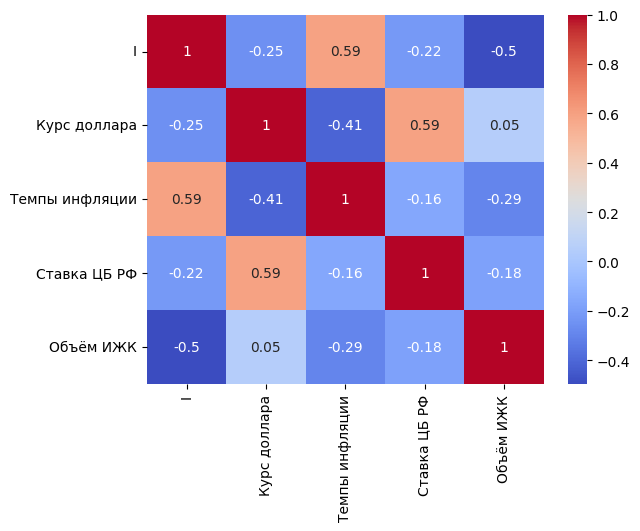

In [12]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [13]:
#отберем топ К коррелируем призна
k = 4

corrmat = df.corr()

cols = corrmat.nlargest(k, 'I')['I']
cols

,I
I,1.000000
Темпы инфляции,0.591017
Ставка ЦБ РФ,-0.220213
Курс доллара,-0.253254


In [14]:
y = np.array(df['I'])
X = np.array(pd.concat([df['Темпы инфляции'], df['Ставка ЦБ РФ']], axis =1))

In [15]:
y[:3]

array([101.1875904 , 100.0786758 , 100.03188024])

In [16]:
X[:3]

array([[0.97, 5.5 ],
       [0.56, 5.5 ],
       [0.34, 7.  ]])

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled[:3]

array([[1.        , 0.        ],
       [0.5060241 , 0.        ],
       [0.24096386, 0.13043478]])

In [19]:
y_new = y.reshape(-1,1)
y_new
y_scaled = scaler.fit_transform(y_new)
y_scaled[:3]

array([[0.66620806],
       [0.58682619],
       [0.58347633]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   random_state = 42)

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [22]:
lr=LinearRegression()
lr = lr.fit(X_train, y_train)

In [23]:
grid_params_0 = {'alpha': [0.1, 1.5, 2.0]}
l2_d = GridSearchCV(linear_model.Ridge(), param_grid=grid_params_0, scoring = 'neg_mean_absolute_error')
l2_d.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={l2_d.best_score_}" )
print(f"Лучшие гиперпараметры = {l2_d.best_params_}")

Минимальная средняя абсолютная ошибка=-0.23102557678675942
Лучшие гиперпараметры = {'alpha': 0.1}


In [24]:
grid_params_0 = {'alpha': [0.1, 1.5, 2.0]}
l2_l = GridSearchCV(linear_model.Lasso(), param_grid=grid_params_0, scoring = 'neg_mean_absolute_error')
l2_l.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={l2_d.best_score_}" )
print(f"Лучшие гиперпараметры = {l2_d.best_params_}")

Минимальная средняя абсолютная ошибка=-0.23102557678675942
Лучшие гиперпараметры = {'alpha': 0.1}


In [25]:
grid_params_EN_d = {'alpha': [0.1, 1.5, 2.0], 'l1_ratio': [0.1, 0.5, 0.9]}
EN_d = GridSearchCV(ElasticNet(), param_grid=grid_params_EN_d, scoring = 'neg_mean_absolute_error')
EN_d.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={EN_d.best_score_}" )
print(f"Лучшие гиперпараметры = {EN_d.best_params_}")

Минимальная средняя абсолютная ошибка=-0.27076434352854784
Лучшие гиперпараметры = {'alpha': 0.1, 'l1_ratio': 0.1}


In [26]:
grid_params_DT_d = {'max_depth': [2, 5, 10, 20]}
DT_d = GridSearchCV(DecisionTreeRegressor(), param_grid=grid_params_DT_d, scoring = 'neg_mean_absolute_error')
DT_d.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={DT_d.best_score_}" )
print(f"Лучшие гиперпараметры = {DT_d.best_params_}")

Минимальная средняя абсолютная ошибка=-0.2839126104378088
Лучшие гиперпараметры = {'max_depth': 5}


In [27]:
grid_params_SVR_d = {'epsilon': [0.1, 0.4, 0.6, 0.8], 'C': [0.1, 1.5, 1.9]}
SVR_d = GridSearchCV(SVR(), param_grid=grid_params_SVR_d, scoring = 'neg_mean_absolute_error')
SVR_d.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={SVR_d.best_score_}" )
print(f"Лучшие гиперпараметры = {SVR_d.best_params_}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Минимальная средняя абсолютная ошибка=-0.23824142813136645
Лучшие гиперпараметры = {'C': 1.9, 'epsilon': 0.1}


In [28]:
grid_params_1={'n_neighbors':[2, 3, 4, 5, 7]}
knn_depth=GridSearchCV(KNeighborsRegressor(), param_grid = grid_params_1, scoring='neg_mean_absolute_error')
knn_depth.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={knn_depth.best_score_}" )
print(f"Лучшие гиперпараметры = {knn_depth.best_params_}")

Минимальная средняя абсолютная ошибка=-0.21131275346534792
Лучшие гиперпараметры = {'n_neighbors': 2}


In [29]:
grid_params_3={'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100]}
RFR_depth=GridSearchCV(RandomForestRegressor(random_state=42), param_grid = grid_params_3, scoring ='neg_mean_absolute_error', cv=5)
RFR_depth.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={RFR_depth.best_score_}" )
print(f"Лучшие гиперпараметры = {RFR_depth.best_params_}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Минимальная средняя абсолютная ошибка=-0.26572730597644967
Лучшие гиперпараметры = {'n_estimators': 40}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [30]:
model_list_d = [lr, l2_d, l2_l, EN_d, DT_d, SVR_d, knn_depth, RFR_depth]
model_name_list = ['lr', 'l1', 'l2', 'EN', 'DT', 'SVR', 'knn', 'RF']

def get_metrics(model_list, model_name_list, X_test, y_test):
    # Создаем пустой список для хранения результатов
    results = []

    # Проходим по всем моделям
    for i in range(len(model_list)):
        y_pred = model_list[i].predict(X_test)

        # Вычисляем метрики
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Добавляем результаты в список
        results.append({
            'Model': model_name_list[i],
            'MAPE': mape,
            'MSE': mse,
            'R2': r2
        })

    # Создаем DataFrame из списка результатов
    results_df = pd.DataFrame(results)
    return results_df

In [31]:
result = get_metrics(model_list_d, model_name_list, X_test, y_test)
result

,Model,MAPE,MSE,R2
0,lr,0.422970,0.046029,-1.059465
1,l1,0.376833,0.032462,-0.452442
2,l2,0.322502,0.023801,-0.064909
3,EN,0.273113,0.014436,0.354102
4,DT,0.495844,0.063829,-1.855890
5,SVR,0.304785,0.030287,-0.355141
6,knn,0.324217,0.023033,-0.030549
7,RF,0.357138,0.035795,-0.601579
